1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
mean = np.mean(m)
print("mean of the matrix: ",mean)
print("mean values of the colunms are: ", np.mean(m, axis = 0))
print("mean values of the rows are: ", np.mean(m, axis = 1))

mean of the matrix:  5.5
mean values of the colunms are:  [4. 5. 6. 7.]
mean values of the rows are:  [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [2]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
c = np.outer(u,v)
print(c)
c1 = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        c1[i][j] = u[i]*v[j]        
print('\n',c1)
u = u.reshape(4,1)
print('\n',u*v)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]

 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [3]:
import numpy.random as npr
a = npr.uniform(0, 3, size=(10, 6))
print(a)
mask = (a >= 0.3)
print('\n',mask)
filtered_a = a[mask]
print('\n',filtered_a)

[[2.68171136 0.096154   2.93730052 1.57414433 2.28185426 2.95365197]
 [0.71336119 2.27757513 1.6353881  1.81575289 2.44204    0.48237584]
 [1.24711835 0.88075855 0.2720444  2.09125332 0.98999419 2.34838052]
 [0.69807027 1.00525735 1.71176787 1.76765766 2.6732632  1.25635614]
 [0.77206704 0.38073302 1.28258915 1.00943824 2.16330113 2.02178537]
 [0.5174492  1.18491399 2.89112472 0.05642131 0.02278785 2.0248444 ]
 [2.96552895 2.16749644 0.90992553 2.38750201 1.61096004 1.56587435]
 [1.64745097 1.42147119 2.31959538 0.03699557 1.31368003 1.30222563]
 [2.3674377  1.63994174 2.96544516 0.62581271 1.5821629  1.64266093]
 [2.5275459  1.95149556 2.82925933 2.30398534 0.00592938 2.98512952]]

 [[ True False  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True False  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True False False  True]
 [ True  True  True  True  True  True]
 [ True  True  True False  True  T

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

In [4]:
array = np.linspace(0, 2*np.pi, 100)
array_extraction = array[::10]
print(array_extraction,"\n")
array_reversed = array[::-1]
print(array_reversed,"\n")
mask=(abs(np.sin(array)-np.cos(array)) < 0.1)
filtered_array = array[mask]
print(filtered_array)

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664] 

[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.26

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
multiplication_table = np.arange(1, 11).reshape(10,1) * np.arange(1, 11)
print(multiplication_table, "\n")
print(np.trace(multiplication_table),'\n')
print(np.diagonal(np.flipud(multiplication_table)), "\n")
print(np.diagonal(multiplication_table, offset=1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

385 

[10 18 24 28 30 30 28 24 18 10] 

[ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [6]:
cities = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]
positions_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances_grid = np.abs(positions_miles - positions_miles[:, np.newaxis]) * 1.60934
print("distance grid:\n", distances_grid)

distance grid:
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.30226 1300.34672 1894.19318 2755.19008]
 [1401.73514 1083.08582  914.10512  217.2609     0.       489.23936
   972.04136 1083.08582 1676.93228 2537.92918]
 [1890.9745  1572.32518 1403.34448  706.50026  489.23936    0.
   482.802    593.84646 1187.69292 2048.68982]
 [2373.7765  2055.12718 1886.14648 1189.30226  972.04136  482.802
     0.       111.04446  704.89092 1565.88782]
 [2484.82096 2166.17164 1997.19094 1300.34672 1083.08582  593.84646
   111.04446    0.       593.84646 1454.84336]
 [3078.66742 2760.0181  2591.0374  1894.19318 1676.93228 1187.69292
   7

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [7]:
import timeit
N = 99

def prime_finder(N):
    mask = np.ones(N, dtype=bool)
    mask[0:2] = False
    prime_numbers = []
    for i in range(2, int(np.sqrt(N))):
        if mask[i] == True:
            mask[i**2:N:i] = False
        
    for i in range(len(mask)):
        if mask[i] == True:
            prime_numbers.append(i)
        
    return(prime_numbers)

time_taken = timeit.timeit(lambda: prime_finder(N), number=100)
print(f"Time taken for N={N}: {time_taken:.6f} seconds")


N_large = 1000
time_taken_large = timeit.timeit(lambda: prime_finder(N_large), number=100)
print(f"Time taken for N={N_large}: {time_taken_large:.6f} seconds")

print("The time complexity of this algorithm is O(N log log N)")
        

Time taken for N=99: 0.008586 seconds
Time taken for N=1000: 0.059744 seconds
The time complexity of this algorithm is O(N log log N)


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

[[-1  1 -1 ...  1 -1 -1]
 [ 1 -1  1 ... -1  1 -1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [-1 -1  1 ... -1 -1  1]
 [ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1  1 -1]] 

walking distances for each walker:
 [[  1   0   1 ... 144 169 196]
 [  1   0   1 ... 100  81 100]
 [  1   4   1 ...   4   1   4]
 ...
 [  1   4   1 ... 144 121 144]
 [  1   4   9 ... 324 289 256]
 [  1   4   9 ... 144 121 144]] 

mean of the squared distances at each step:
 [  1.      1.956   2.912   3.896   5.12    6.184   7.328   8.504   9.872
  10.872  11.712  12.796  13.68   14.612  15.08   15.972  16.656  17.632
  18.568  19.844  21.088  22.508  23.536  24.096  25.128  26.084  27.568
  28.856  29.976  30.976  32.056  33.416  33.92   34.752  35.664  36.74
  38.368  39.24   40.88   41.904  42.64   43.36   44.264  45.624  46.448
  47.816  48.912  49.916  50.896  51.504  51.552  53.072  55.     54.832
  55.552  56.672  57.432  58.848  59.576  60.02   60.944  61.652  62.592
  63.556  64.864  66.46   67.464  69.304  69.696  70.836 

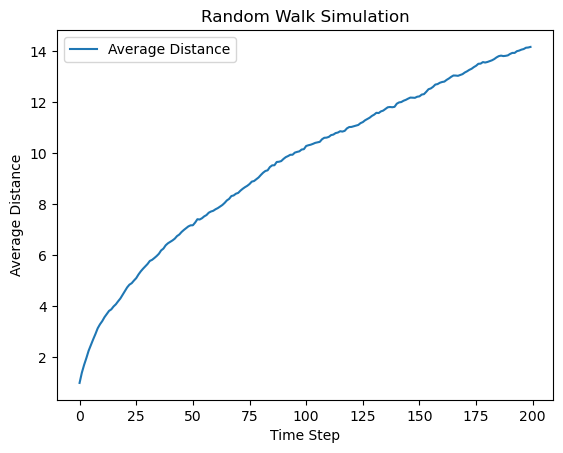

In [8]:
import matplotlib.pyplot as plt
random_walk = npr.randint(0, 2, (1000, 200))
random_walk = (random_walk*2)-1
print(random_walk, '\n')
walking_distances = np.cumsum(random_walk, axis = 1)
walking_distances = walking_distances**2
print("walking distances for each walker:\n",walking_distances, '\n')
mean_squared_distances = np.mean(walking_distances, axis = 0)
print('mean of the squared distances at each step:\n', mean_squared_distances)

plt.plot(np.sqrt(mean_squared_distances), label='Average Distance')
plt.xlabel('Time Step')
plt.ylabel('Average Distance')
plt.title('Random Walk Simulation')
plt.legend()
plt.show()